In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("ANZ%20synthesised%20transaction%20dataset.xlsx; filename%2A.xlsx")

In [4]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

There are 12043 records available for each data column and some features have missing values

In [8]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [9]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


### selecting relevant features 

In [11]:
df = data[["status","card_present_flag","balance","date",
                   "gender","age","merchant_suburb","merchant_state",
                   "amount","customer_id","movement"]]

In [17]:
df['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [18]:
df.head()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   balance            12043 non-null  float64       
 3   date               12043 non-null  datetime64[ns]
 4   gender             12043 non-null  object        
 5   age                12043 non-null  int64         
 6   merchant_suburb    7717 non-null   object        
 7   merchant_state     7717 non-null   object        
 8   amount             12043 non-null  float64       
 9   customer_id        12043 non-null  object        
 10  movement           12043 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 1.0+ MB


### Exploratory Data analysis

In [20]:
df["date"].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [23]:
df['merchant_suburb'].value_counts()

Melbourne        255
Sydney           233
Southport         82
Brisbane City     79
Chatswood         55
                ... 
Spotswood          1
Manning            1
Bellerive          1
Hocking            1
Saint Clair        1
Name: merchant_suburb, Length: 1609, dtype: int64

In [24]:
df['merchant_suburb'].value_counts().sum()

7717

##### number of transection made by each customer

In [26]:
df['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [27]:
df.shape

(12043, 11)

In [28]:
df.describe()

,card_present_flag,balance,age,amount
count,7717.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,14704.195553,30.582330,187.933588
std,0.398029,31503.722652,10.046343,592.599934
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


In [29]:
# average transection amount

amount = df['amount']
avg_trnsc_amt = amount.sum()/amount.count()
print(avg_trnsc_amt)

187.93358797641784


there must be outliers

In [30]:
df['movement'].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [32]:
## let see null values count
df.isnull().sum()

status                  0
card_present_flag    4326
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
amount                  0
customer_id             0
movement                0
dtype: int64

we can not drop any of them as they can be very useful.

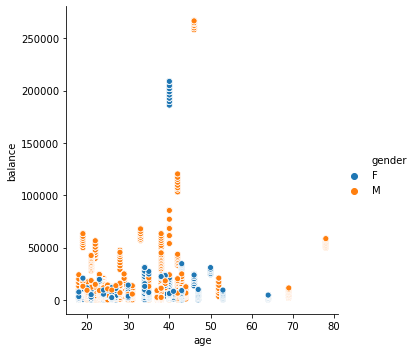

In [38]:
sns.relplot(x='age',y='balance', hue='gender', data=df)

In [46]:
df[df['balance'] >= 120000].count()

status               220
card_present_flag     97
balance              220
date                 220
gender               220
age                  220
merchant_suburb       97
merchant_state        97
amount               220
customer_id          220
movement             220
dtype: int64

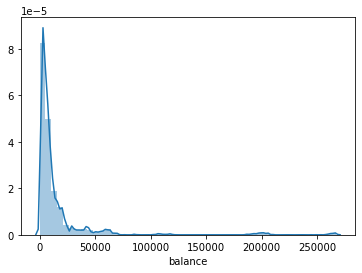

In [47]:
sns.distplot(df['balance'])

there are 220 customers whose balance grater than 120k (greater than normal )

#### mean transection amoount each day


In [50]:
df_date_mean = df.groupby("date").mean()
trans_amt = df_date_mean["amount"].mean()
df_date_count = df.groupby("date").count()

In [52]:
n_points = len(df_date_count.index)
n_points

91

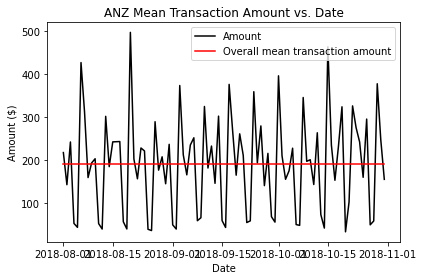

In [54]:
plt.figure()
plt.plot(df_date_count.index, df_date_mean["amount"], c="black", label = "Amount")
plt.plot(df_date_count.index, np.linspace(trans_amt,trans_amt,n_points), c="r", label = "Overall mean transaction amount")
plt.title("ANZ Mean Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

#### fg

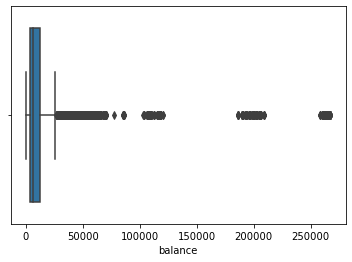

In [56]:
sns.boxplot(df['balance'])

there are huge amount of outiers we have to clean the data.

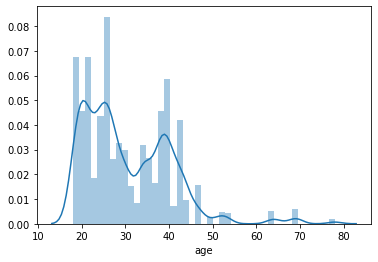

In [58]:
sns.distplot(df['age'])

In [59]:
df['age'].mean()

30.5823299842232

In [60]:
#correct

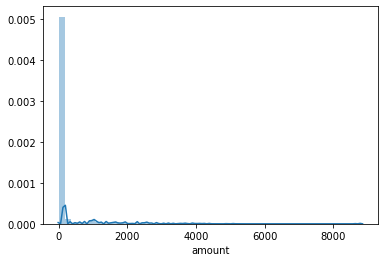

In [61]:
sns.distplot(df['amount'])

In [62]:
df['amount'].mean()

187.93358797641767

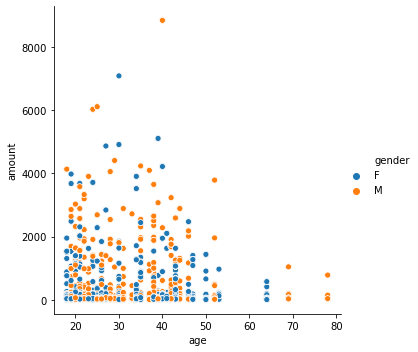

In [63]:
sns.relplot(x='age',y='amount', hue='gender', data=df)